# Adaline Assignment

### Reading the data

In [45]:
import numpy as np
import pandas as pd


s = 'data.csv'
print('Data file:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
    
    
df.tail()

Data file: data.csv


,0,1,2
95,0.77029,0.70140,0
96,0.73156,0.71782,0
97,0.44556,0.77991,0
98,0.85275,0.85987,0
99,0.51912,0.62359,0


<br>

### Plotting the data

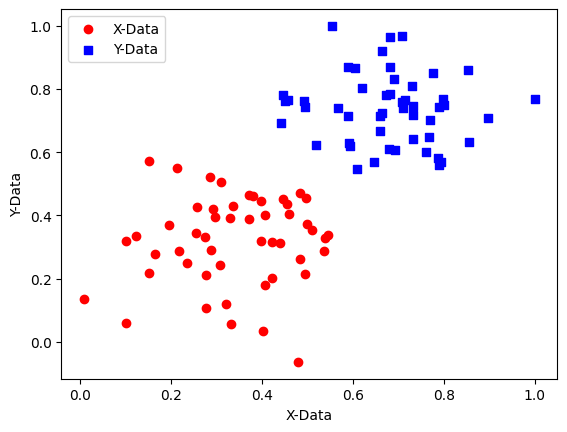

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


# Setting x and y
X = df.iloc[0:100, [0, 1]].values  # get index 0 and 1 values from entry [0 to 100]

# Training data
y = df.iloc[0:100, 2].values
y = np.where(y == 1, 0, 1)


# Plot data
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='o', label='X-Data')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Y-Data')


# Plot label
plt.xlabel('X-Data')
plt.ylabel('Y-Data')
plt.legend(loc='upper left')

plt.show()

<br>

### A function for plotting decision regions

In [47]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

<br>
<br>

## Implementing Perceptron

In [48]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = [] # used only for reporting
        
        # calculate and print the number of initial errors
        initial_errors = 0
        for xi, target in zip(X, y):
            if self.predict(xi) != target:
                initial_errors += 1
        print("initial errors: ", initial_errors)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                print("xi: ", xi, "Target: ", target, "Prediction: ", self.predict(xi))
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            print("Errors: ", errors)
        return self
    
    # The dot product (np.dot) of two 1d arrays is what you get 
    # from multiplying corresponding values and adding up the results.

    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, 0)

<br>

## Implementing AdalineGD

In [49]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            
            #for w_j in range(self.w_.shape[0]):
            #    self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<br>
<br>

### Improving gradient descent through feature scaling

In [50]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

<br>
<br>

## Plotting

### Learning rate with respect to epochs - Perceptron

initial errors:  50
xi:  [ 0.48051  -0.063669] Target:  0 Prediction:  1
xi:  [0.28774 0.29139] Target:  0 Prediction:  0
xi:  [0.40714 0.17878] Target:  0 Prediction:  0
xi:  [0.2923 0.4217] Target:  0 Prediction:  0
xi:  [0.50922 0.35256] Target:  0 Prediction:  0
xi:  [0.27785 0.10802] Target:  0 Prediction:  0
xi:  [0.27527 0.33223] Target:  0 Prediction:  0
xi:  [0.43999 0.31245] Target:  0 Prediction:  0
xi:  [0.33557 0.42984] Target:  0 Prediction:  0
xi:  [0.23448 0.24986] Target:  0 Prediction:  0
xi:  [0.0084492 0.13658  ] Target:  0 Prediction:  0
xi:  [0.12419 0.33595] Target:  0 Prediction:  0
xi:  [0.25644 0.42624] Target:  0 Prediction:  0
xi:  [0.4591  0.40426] Target:  0 Prediction:  0
xi:  [0.44547 0.45117] Target:  0 Prediction:  0
xi:  [0.42218 0.20118] Target:  0 Prediction:  0
xi:  [0.49563 0.21445] Target:  0 Prediction:  0
xi:  [0.30848 0.24306] Target:  0 Prediction:  0
xi:  [0.39707 0.44438] Target:  0 Prediction:  0
xi:  [0.32945 0.39217] Target:  0 Predictio

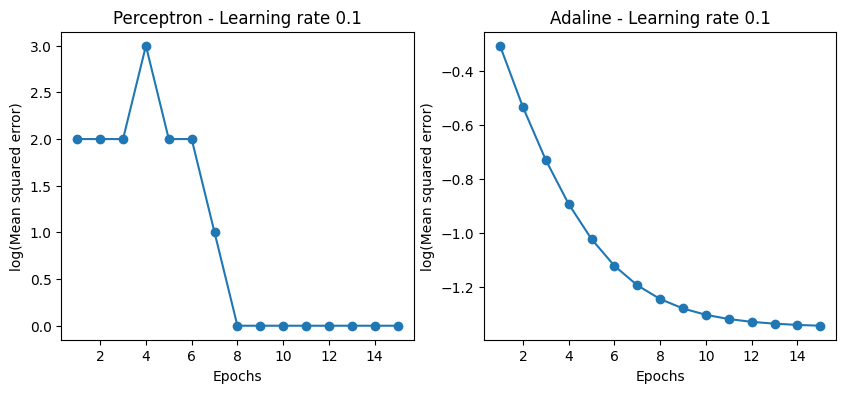

In [51]:
fig, px = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ppn1 = Perceptron(eta=0.1, n_iter=15, random_state=10).fit(X, y)
px[0].plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
px[0].set_xlabel('Epochs')
px[0].set_ylabel('log(Mean squared error)')
px[0].set_title('Perceptron - Learning rate 0.1')

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X_std, y)
px[1].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
px[1].set_xlabel('Epochs')
px[1].set_ylabel('log(Mean squared error)')
px[1].set_title('Adaline - Learning rate 0.1')


plt.show()

<br>

### Learning rate with respect to epochs - AdalineGD

initial errors:  50
xi:  [ 0.48051  -0.063669] Target:  0 Prediction:  1
xi:  [0.28774 0.29139] Target:  0 Prediction:  1
xi:  [0.40714 0.17878] Target:  0 Prediction:  1
xi:  [0.2923 0.4217] Target:  0 Prediction:  1
xi:  [0.50922 0.35256] Target:  0 Prediction:  1
xi:  [0.27785 0.10802] Target:  0 Prediction:  1
xi:  [0.27527 0.33223] Target:  0 Prediction:  1
xi:  [0.43999 0.31245] Target:  0 Prediction:  1
xi:  [0.33557 0.42984] Target:  0 Prediction:  1
xi:  [0.23448 0.24986] Target:  0 Prediction:  1
xi:  [0.0084492 0.13658  ] Target:  0 Prediction:  1
xi:  [0.12419 0.33595] Target:  0 Prediction:  1
xi:  [0.25644 0.42624] Target:  0 Prediction:  1
xi:  [0.4591  0.40426] Target:  0 Prediction:  1
xi:  [0.44547 0.45117] Target:  0 Prediction:  1
xi:  [0.42218 0.20118] Target:  0 Prediction:  1
xi:  [0.49563 0.21445] Target:  0 Prediction:  1
xi:  [0.30848 0.24306] Target:  0 Prediction:  1
xi:  [0.39707 0.44438] Target:  0 Prediction:  1
xi:  [0.32945 0.39217] Target:  0 Predictio

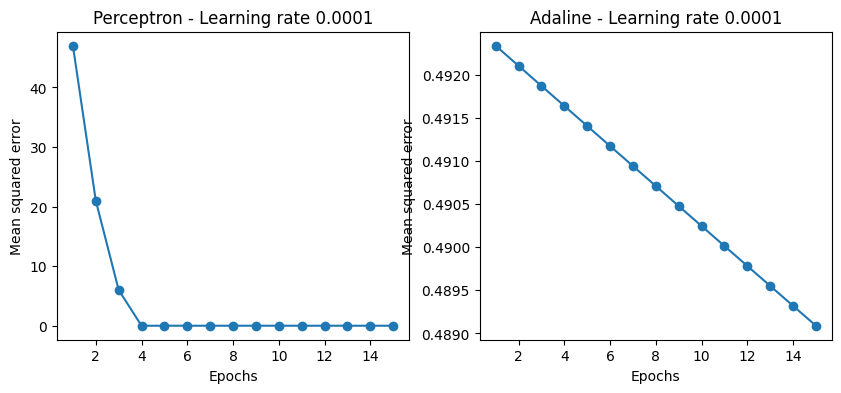

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ppn2 = Perceptron(eta=0.0001, n_iter=15, random_state=10).fit(X, y)
ax[0].plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Mean squared error')
ax[0].set_title('Perceptron - Learning rate 0.0001')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X_std, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

<br>

### Decision region - Perceptron

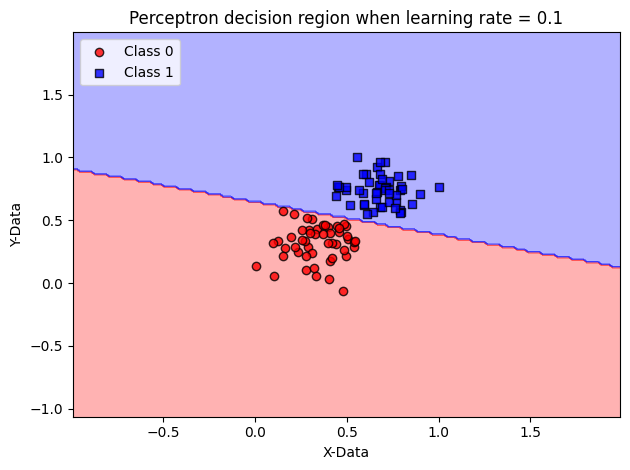

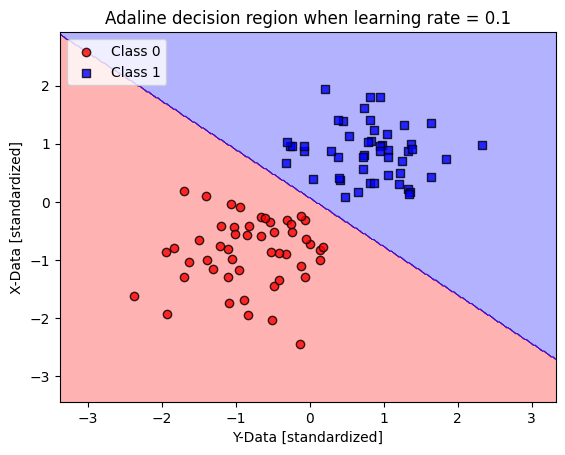

In [53]:
# Decision Region when learning rate is 0.1
plot_decision_regions(X, y, classifier=ppn1)
plt.xlabel('X-Data')
plt.ylabel('Y-Data')
plt.legend(loc='upper left')
plt.title("Perceptron decision region when learning rate = 0.1")
plt.tight_layout()

plt.show()


# Decision Region when learning rate is 0.1
plot_decision_regions(X_std, y, classifier=ada1)
plt.title('Adaline - Gradient descent')
plt.xlabel('Y-Data [standardized]')
plt.ylabel('X-Data [standardized]')
plt.legend(loc='upper left')
plt.title("Adaline decision region when learning rate = 0.1")

plt.show()

<br>

### Decision region - AdalineGD

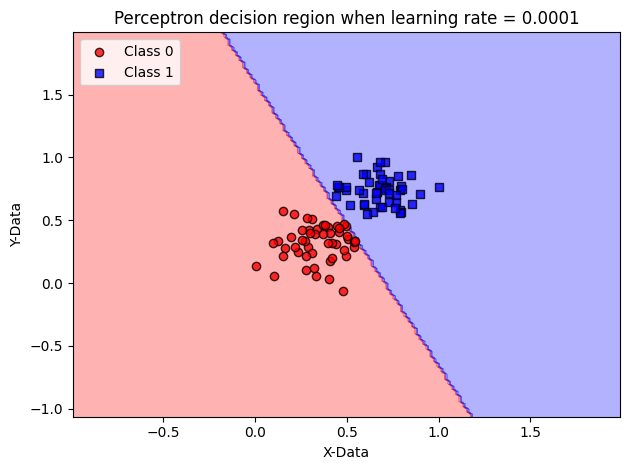

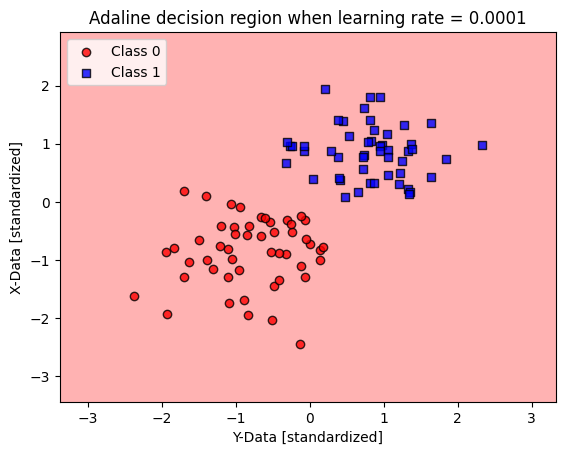

In [54]:
# Decision Region when learning rate is 0.0001
plot_decision_regions(X, y, classifier=ppn2)
plt.xlabel('X-Data')
plt.ylabel('Y-Data')
plt.legend(loc='upper left')
plt.title("Perceptron decision region when learning rate = 0.0001")
plt.tight_layout()

plt.show()

# Decision Region when learning rate is 0.0001
plot_decision_regions(X_std, y, classifier=ada2)
plt.title('Adaline - Gradient descent')
plt.xlabel('Y-Data [standardized]')
plt.ylabel('X-Data [standardized]')
plt.legend(loc='upper left')
plt.title("Adaline decision region when learning rate = 0.0001")

plt.show()